<a href="https://colab.research.google.com/github/Saulrega/NLP/blob/main/01_N_ghrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Configuración inicial

In [ ]:
import nltk 
nltk.download("book")
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

##Bi-gramas
- Parejas de palabras que ocurren consecutivamente

In [ ]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

In [ ]:
fdist.most_common(15)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557),
 ((',', 'as'), 523),
 ((',', 'I'), 461),
 ((',', 'he'), 446),
 (('from', 'the'), 428),
 ((',', 'in'), 402)]

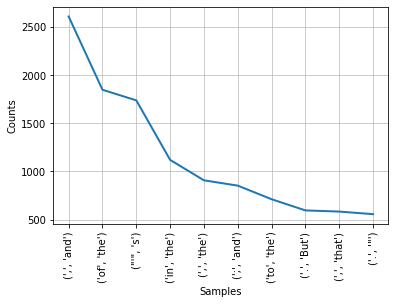

In [ ]:
fdist.plot(10)

##Filtrado de bi-gramas


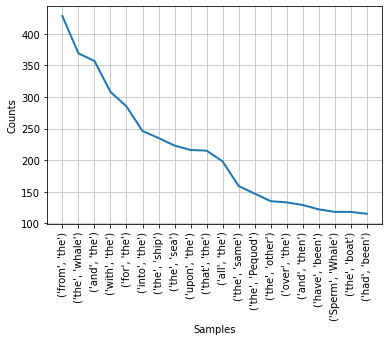

In [ ]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if (len(bigram[0])>threshold 
                                                       and len(bigram[1])>threshold)]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

##Tri-gramas

In [ ]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

# Collocations (Colocaciones)


In [ ]:
md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if(len(bigram[0])>threshold 
                                                       and len(bigram[1])>threshold)]
filtered_bigrams_dist = FreqDist(filtered_bigrams)
filtered_words = [word for word in text1 if (len(word)>threshold)]
filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigrams_dist[x]) 
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_words_dist[x])
df

# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(
    lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])), axis=1
)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

In [ ]:
df.sort_values(by='PMI')

In [ ]:
fig = px.scatter(x= df['PMI'].values, y=df['log(bi_gram_freq)'].values , 
                 color= df['PMI']+df['log(bi_gram_freq)'], 
                 hover_name= df['bi_grams'].values, width= 700, 
                 height= 600, labels={'x': 'PMI', 'y': 'Log(Bigram frequency)'})
fig.show()

##Medidas pre-construidas en NLTK

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

##Textos en Español

In [ ]:
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents() 
flatten_corpus = [w for l in corpus for w in l]

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [ ]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]